# Proyek Analisis Data: Bike Sharing
- **Nama:** Rifda Nasywatul Affah
- **Email:** rifdana123@gmail.com
- **ID Dicoding:** rifda_nsywtlllll278

## Menentukan Pertanyaan Bisnis
- Bagaimana pendapatan dari penyewaan sepeda setiap bulannya?
- Seberapa sering transaksi pelanggan casual dibandingkan pelanggan registered?
- Seberapa sering pelanggan melakukan transaksi dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat tabel day

In [2]:
day_df = pd.read_csv("C:\\COOLYEAH\\bangkit\\submission_analisis_data\\Bike-sharing-dataset\\day.csv")
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


#### Memuat tabel hour

In [3]:
hour_df = pd.read_csv("C:\\COOLYEAH\\bangkit\\submission_analisis_data\\Bike-sharing-dataset\\hour.csv")
print(hour_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Setelah melakukan load data, kedua DataFrame memunculkan 5 baris teratasnya

### Assesing Data

#### Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Mencari missing values day_df

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Memeriksa duplikasi data

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Memeriksa parameter statistik

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Mencari missing values hour_df

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Memeriksa duplikasi data

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Memeriksa parameter statistik

hour_df.describe()

**Insight:**
- Pada DataFrame day_df dan hour_df tidak terdapat missing value
- Pada DataFrame day_df dan hour_df tidak terdapat duplikasi data
- Pada DataFrame day_df dan hour_df tidak terdapat inaccurate value
- Pada DataFrame day_df dan hour_df sama-sama memiliki kesalahan tipe data pada kolom dtetime

### Cleaning Data

#### Membersihkan Data day_df
##### Mengatasi kesalahan tipe data untuk kolom dtetime

In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

##### Memeriksa tipe data yang telah diganti

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan Data hour_df
##### Mengatasi kesalahan tipe data untuk kolom dtetime

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(day_df[column])

##### Memeriksa tipe data yang telah diganti

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Setelah dilakukan pergantian tipe data, kolom dtetime pada DataFrame day_df dan hour_df sudah sesuai

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df
#### Melihat kembali parameter statistik dari day_df

In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Mengelompokkan berdasarkan kolom season, lalu menghitung agregasi dari kolom lain seperti cnt (jumlah total pengguna), casual, atau registered

In [16]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"],
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
})

cnt                                 casual                    \
         max   min         mean          std    max  min         mean   
season                                                                  
1       7836   431  2604.132597  1399.942119   3155    9   334.928177   
2       8362   795  4992.331522  1695.977235   3410  120  1106.097826   
3       8714  1115  5644.303191  1459.800381   3160  118  1202.611702   
4       8555    22  4728.162921  1699.615261   3031    2   729.112360   

                   registered                                 
               std        max  min         mean          std  
season                                                        
1       387.655561       5315  416  2269.204420  1200.269751  
2       737.590829       6456  674  3886.233696  1353.375628  
3       595.975032       6917  889  4441.691489  1304.626949  
4       606.318118       6946   20  3999.050562  1444.782557

#### Mengelompokkan jumlah pengguna berdasarkan bulan

In [17]:
day_df.groupby(by="mnth").agg({
    "cnt": ["max", "min", "mean", "std"],
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "temp": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"]
})

cnt                                 casual                    \
       max   min         mean          std    max  min         mean   
mnth                                                                  
1     4521   431  2176.338710  1161.674370   1070    9   194.225806   
2     5062  1005  2655.298246  1145.313307   1435   47   262.508772   
3     8362   605  3692.258065  1899.301812   3155   46   716.838710   
4     7460   795  4484.900000  1776.160778   3252  120  1013.366667   
5     8294  2633  5349.774194  1298.711561   3410  255  1214.274194   
6     8120  3767  5772.366667  1240.400031   2963  477  1231.766667   
7     8173  3285  5563.677419  1273.751871   3065  562  1260.596774   
8     7865  1115  5664.419355  1494.516146   2827  226  1161.919355   
9     8714  1842  5766.516667  1810.130649   3160  118  1172.050000   
10    8156    22  5199.225806  1988.392517   3031    2   963.870968   
11    6852  1495  4247.183333  1285.712709   2290   69   610.050000   
12    6606   441  3403.806452  1549.639353   1153    9   349.887097   

                 registered                                      temp  \
             std        max   min         mean          std       max   
mnth                                                                    
1     197.384490       4185   416  1982.112903  1053.274474  0.425000   
2     232.283549       4546   905  2392.789474  1091.126003  0.521667   
3     624.308094       5893   491  2975.419355  1513.254354  0.601667   
4     738.345585       5950   674  3471.533333  1414.571151  0.664167   
5     754.950311       6433  2213  4135.500000  1093.179612  0.775000   
6     664.017647       6456  2993  4540.600000  1012.958885  0.834167   
7     598.382778       6790  2298  4303.080645  1190.542490  0.861667   
8     466.576274       6541   889  4502.500000  1335.126601  0.793333   
9     738.378375       6946  1689  4594.466667  1547.716749  0.753333   
10    703.205576       6911    20  4235.354839  1685.022519  0.657500   
11    470.933096       5520   935  3637.133333  1219.589045  0.530000   
12    222.634531       6055   432  3053.919355  1465.052959  0.475833   

                                   windspeed                                
           min      mean       std       max       min      mean       std  
mnth                                                                        
1     0.059130  0.236444  0.083266  0.415429  0.073396  0.206303  0.080048  
2     0.127500  0.299226  0.084314  0.507463  0.045408  0.215684  0.090922  
3     0.198333  0.390539  0.104674  0.441563  0.089558  0.222699  0.077962  
4     0.300000  0.469999  0.087255  0.388067  0.065929  0.234482  0.077204  
5     0.414167  0.594798  0.072999  0.342667  0.074637  0.182989  0.063039  
6     0.540833  0.684097  0.066094  0.347642  0.077125  0.185420  0.061183  
7     0.595833  0.755470  0.051950  0.284813  0.080850  0.166059  0.043746  
8     0.635833  0.708582  0.039913  0.375617  0.070283  0.172918  0.064354  
9     0.469167  0.616485  0.061916  0.357587  0.050379  0.165945  0.066339  
10    0.254167  0.485012  0.084009  0.422275  0.022392  0.175205  0.086656  
11    0.245833  0.369220  0.064527  0.376871  0.046650  0.183801  0.085289  
12    0.215833  0.324031  0.067852  0.407346  0.047275  0.176609  0.087777

**Insight:**
- Rata-rata penggunaan sepeda (cnt) adalah 4504 dengan nilai min 22 dan maks 8714
- Rata-rata pengguna casual per hari sekitar 848, sementara pengguna registered memiliki rata-rata 3656. Hal ini menunjukkan bahwa pengguna registered memiliki lebih banyak transaksi dibandingkan pengguna casual
- Rata-rata dari temperatur (temp) sekitar 0.49 dengan rata-rata kelembapan (hum) 0.63 dan rata-rata kecepatan angin (winspeed) 0.19
- Sebagian besar pengguna menyewa untuk hari kerja dibanding hari libur

### Eksplorasi Data hour_df
#### Melihat kembali parameter statistik dari hour_df

In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-01 00:00:00,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Mengelompokkan jumlah pengguna berdasarkan jam 

In [19]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std"],  # Statistik jumlah pengguna total
    "casual": ["max", "min", "mean", "std"],  # Statistik jumlah pengguna kasual
    "registered": ["max", "min", "mean", "std"],  # Statistik jumlah pengguna terdaftar
    "temp": ["mean"],  # Rata-rata suhu per jam
    "hum": ["mean"],  # Rata-rata kelembaban per jam
    "windspeed": ["mean"]  # Rata-rata kecepatan angin per jam
})

cnt                             casual                            \
    max min        mean         std    max min       mean        std   
hr                                                                     
0   283   2   53.898072   42.307910     68   0  10.158402  10.667953   
1   168   1   33.375691   33.538727     49   0   6.504144   7.735334   
2   132   1   22.869930   26.578642     44   0   4.772028   6.514780   
3    79   1   11.727403   13.239190     26   0   2.715925   4.315795   
4    28   1    6.352941    4.143818     13   0   1.253945   1.887669   
5    66   1   19.889819   13.200765     16   0   1.411437   1.790581   
6   213   1   76.044138   55.084348     19   0   4.161379   3.691509   
7   596   1  212.064649  161.441936     40   0  11.055021   8.356205   
8   839   5  359.011004  235.189285     69   0  21.679505  13.741229   
9   426  14  219.309491   93.703458    142   0  30.891334  24.472856   
10  539   8  173.668501  102.205413    209   0  46.477304  41.346206   
11  663  10  208.143054  127.495536    268   0  59.540578  54.481788   
12  776   3  253.315934  145.081134    362   0  68.293956  64.394237   
13  760  11  253.661180  148.107657    355   0  72.308642  69.819228   
14  750  12  240.949246  147.271574    361   0  75.567901  71.599225   
15  750   7  251.233196  144.632541    357   0  74.905350  70.289359   
16  783  11  311.983562  148.682618    367   0  73.745205  67.015206   
17  976  15  461.452055  232.656611    347   0  74.273973  61.491021   
18  977  23  425.510989  224.639304    266   0  61.120879  50.981553   
19  743  11  311.523352  161.050359    230   0  48.770604  42.328913   
20  567  11  226.030220  119.670164    237   0  36.233516  32.103347   
21  584   6  172.314560   89.788893    222   0  28.255495  25.378252   
22  502   9  131.335165   69.937782    175   0  22.252747  20.450211   
23  256   2   87.831044   50.846889     71   0  15.199176  13.804596   

   registered                                  temp       hum windspeed  
          max min        mean         std      mean      mean      mean  
hr                                                                       
0         234   0   43.739669   34.019585  0.467410  0.691019  0.161758  
1         139   0   26.871547   27.344153  0.459365  0.704213  0.158659  
2         104   0   18.097902   21.303895  0.454573  0.716825  0.154519  
3          61   0    9.011478    9.743691  0.453113  0.729785  0.150929  
4          22   0    5.098996    3.134479  0.446628  0.742367  0.155813  
5          64   0   18.478382   12.674751  0.436123  0.742929  0.150342  
6         203   0   71.882759   53.535307  0.432469  0.744179  0.157722  
7         572   1  201.009629  157.120459  0.439092  0.730908  0.163916  
8         808   4  337.331499  229.698404  0.454993  0.702682  0.176563  
9         399   6  188.418157   84.633490  0.476726  0.661692  0.191262  
10        351   8  127.191197   66.281668  0.500578  0.616066  0.202041  
11        446   5  148.602476   79.090301  0.522613  0.571431  0.207339  
12        526   3  185.021978   89.240873  0.540275  0.536703  0.216013  
13        491   9  181.352538   87.424775  0.554733  0.511591  0.221633  
14        502  12  165.381344   84.055205  0.565075  0.496982  0.232462  
15        456   4  176.327846   84.488219  0.568615  0.492126  0.235143  
16        481   8  238.238356  103.765726  0.564959  0.495795  0.237317  
17        885  14  387.178082  211.676303  0.554575  0.513438  0.233371  
18        886  20  364.390110  203.599896  0.541181  0.535989  0.224684  
19        662  11  262.752747  138.708622  0.524176  0.572445  0.210148  
20        461   8  189.796703  100.293791  0.508599  0.601470  0.195222  
21        362   6  144.059066   73.149848  0.495302  0.631538  0.180871  
22        327   5  109.082418   55.252765  0.484505  0.653146  0.174640  
23        220   2   72.631868   40.446431  0.475027  0.673269  0.164802

### Mengelompokkan jumlah pengguna berdasarkan hari dalam seminggu

In [20]:
hour_df.groupby(by="weekday").agg({
    "cnt": ["max", "min", "mean", "std"],  # Statistik jumlah pengguna total
    "casual": ["max", "min", "mean", "std"],  # Statistik jumlah pengguna kasual
    "registered": ["max", "min", "mean", "std"],  # Statistik jumlah pengguna terdaftar
    "temp": ["mean"],  # Rata-rata suhu per hari
    "hum": ["mean"],  # Rata-rata kelembaban per hari
    "windspeed": ["mean"]  # Rata-rata kecepatan angin per hari
})

cnt                             casual                            \
         max min        mean         std    max min       mean        std   
weekday                                                                     
0        776   1  177.468825  168.167710    317   0  56.163469  68.090663   
1        968   1  183.744655  179.514167    272   0  28.553449  35.097056   
2        970   1  191.238891  187.820480    178   0  23.580514  26.170895   
3        977   1  191.130505  190.894464    237   0  23.159192  27.790658   
4        976   1  196.436665  188.011923    154   0  24.872521  27.768088   
5        957   1  196.135907  174.076894    264   0  31.458786  36.487534   
6        783   1  190.209793  179.820569    367   0  61.246815  77.020582   

        registered                                  temp       hum windspeed  
               max min        mean         std      mean      mean      mean  
weekday                                                                       
0              526   0  121.305356  105.972899  0.483821  0.627994  0.188093  
1              857   0  155.191206  159.517897  0.495046  0.635651  0.188863  
2              871   0  167.658377  170.103245  0.508569  0.639833  0.191917  
3              886   0  167.971313  172.344752  0.506675  0.644820  0.187172  
4              885   0  171.564144  169.327395  0.507017  0.609628  0.191987  
5              757   0  164.677121  149.905977  0.496429  0.613840  0.186430  
6              491   0  128.962978  108.600931  0.481847  0.619084  0.196190

**Insight:**
- Rata-rata penggunaan sepeda per jam (cnt) adalah 189 dengan nilai min 1 dan maks 977
- Rata-rata pengguna casual per jam sekitar 35, sementara pengguna registered memiliki rata-rata 153. Hal ini menunjukkan bahwa pengguna registered memiliki lebih banyak transaksi dibandingkan pengguna casual
- Ada 4 musim yang diwakili oleh nilai 1 hingga 4, dengan distribusi rata-rata di sekitar 2.5, yang menunjukkan bahwa data tersebar secara merata di seluruh musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [21]:
monthly_performance = day_df.groupby(day_df['dteday'].dt.to_period('M')).agg({
    'cnt': 'sum'  # Total penyewaan
}).reset_index()

print(monthly_performance)

     dteday     cnt
0   2011-01   38189
1   2011-02   48215
2   2011-03   64045
3   2011-04   94870
4   2011-05  135821
5   2011-06  143512
6   2011-07  141341
7   2011-08  136691
8   2011-09  127418
9   2011-10  123511
10  2011-11  102167
11  2011-12   87323
12  2012-01   96744
13  2012-02  103137
14  2012-03  164875
15  2012-04  174224
16  2012-05  195865
17  2012-06  202830
18  2012-07  203607
19  2012-08  214503
20  2012-09  218573
21  2012-10  198841
22  2012-11  152664
23  2012-12  123713


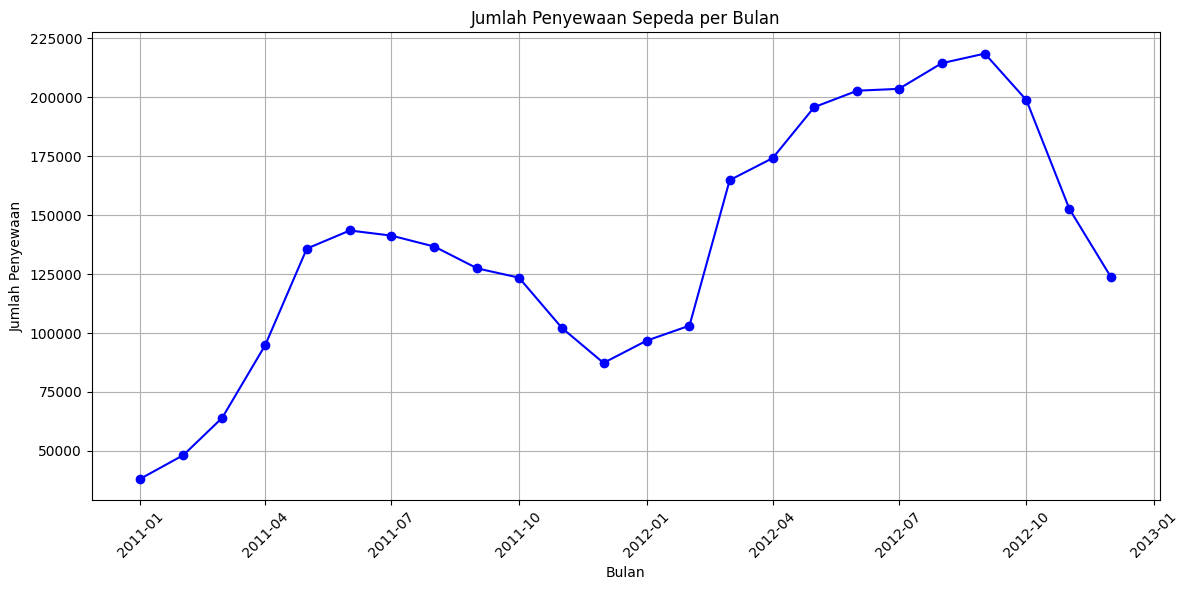

In [22]:
# Mengubah kolom periode menjadi datetime untuk visualisasi
monthly_performance['dteday'] = monthly_performance['dteday'].dt.to_timestamp()

# Visualisasi menggunakan grafik garis
plt.figure(figsize=(12, 6))
plt.plot(monthly_performance['dteday'], monthly_performance['cnt'], marker='o', linestyle='-', color='blue')
plt.title('Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### Pertanyaan 2:

In [23]:
monthly_avg = day_df.groupby(day_df['dteday'].dt.to_period('M')).agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

print(monthly_avg)

     dteday       casual   registered
0   2011-01    99.129032  1132.774194
1   2011-02   222.928571  1499.035714
2   2011-03   413.741935  1652.225806
3   2011-04   744.866667  2417.466667
4   2011-05  1001.612903  3379.709677
5   2011-06  1020.400000  3763.333333
6   2011-07  1175.870968  3383.516129
7   2011-08   930.387097  3479.000000
8   2011-09   884.833333  3362.433333
9   2011-10   813.612903  3170.612903
10  2011-11   519.800000  2885.766667
11  2011-12   272.516129  2544.354839
12  2012-01   289.322581  2831.451613
13  2012-02   300.724138  3255.724138
14  2012-03  1019.935484  4298.612903
15  2012-04  1281.866667  4525.600000
16  2012-05  1426.935484  4891.290323
17  2012-06  1443.133333  5317.866667
18  2012-07  1345.322581  5222.645161
19  2012-08  1393.451613  5526.000000
20  2012-09  1459.266667  5826.500000
21  2012-10  1114.129032  5300.096774
22  2012-11   700.300000  4388.500000
23  2012-12   427.258065  3563.483871


<Figure size 1200x600 with 0 Axes>

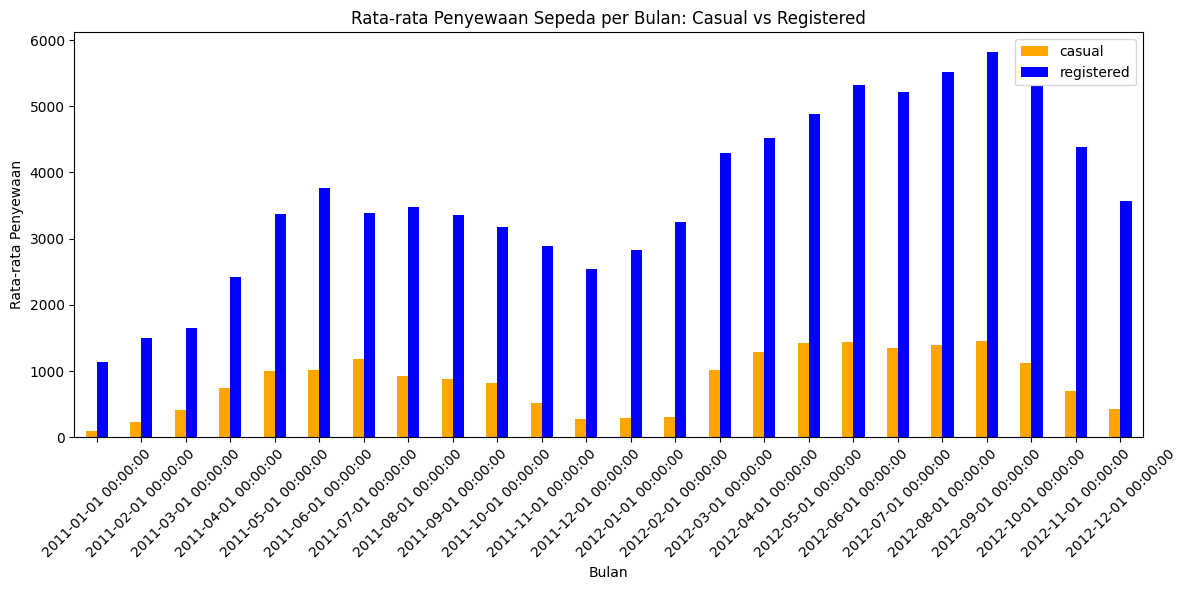

In [24]:
# Mengubah periode menjadi format timestamp untuk visualisasi
monthly_avg['dteday'] = monthly_avg['dteday'].dt.to_timestamp()

# Visualisasi data perbandingan rata-rata penyewaan casual dan registered per bulan
plt.figure(figsize=(12, 6))

# Visualisasi menggunakan grafik batang untuk lebih jelas
monthly_avg.plot(x='dteday', y=['casual', 'registered'], kind='bar', figsize=(12, 6), color=['orange', 'blue'])
plt.title('Rata-rata Penyewaan Sepeda per Bulan: Casual vs Registered')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 3:

In [25]:
# Menghitung total penyewaan berdasarkan hari dalam seminggu
weekday_usage = hour_df.groupby(by="weekday").agg({
    "cnt": "sum"
}).reset_index()

print(weekday_usage)

   weekday     cnt
0        0  444027
1        1  455503
2        2  469109
3        3  473048
4        4  485395
5        5  487790
6        6  477807


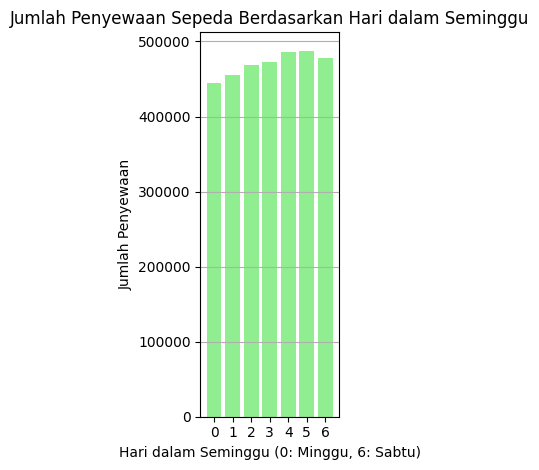

In [26]:
# Visualisasi menggunakan grafik batang untuk weekday
plt.subplot(1, 3, 2)
plt.bar(weekday_usage['weekday'], weekday_usage['cnt'], color='lightgreen')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0: Minggu, 6: Sabtu)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(weekday_usage['weekday'])  # Menampilkan label hari
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Insight:**
- Bagaimana pendapatan dari penyewaan sepeda setiap bulannya?
  Untuk pertanyaan pertama dijawab dengan melakukan pengelompokan data pengguna setiap bulannya
- Seberapa sering transaksi pelanggan casual dibandingkan pelanggan registered?
  Untuk pertanyaan kedua dijawab dengan melakukan perbandingan jumlah penyewaan antara pengguna casual dan registered
- Seberapa sering pelanggan melakukan transaksi dalam seminggu?
  Untuk pertanyaan ketiga dijawab dengan melakukan pengelompokan data pengguna setiap hari

## Analisis Lanjutan (Clustering)
- Melakukan clustering berdasarkan kondisi cuaca menggunakan kolom weathersit. 
- Menghitung total penyewaan sepeda, rata-rata suhu, dan rata-rata kelembapan untuk setiap kategori cuaca.
- Menampilkan hasil clustering untuk melihat total penyewaan sepeda berdasarkan kondisi cuaca.

In [27]:
# Clustering berdasarkan kondisi cuaca (weathersit)
weather_clustering = hour_df.groupby(by="weathersit").agg({
    'cnt': 'sum',  # Total penyewaan
    'temp': 'mean',  # Rata-rata suhu
    'hum': 'mean'  # Rata-rata kelembapan
}).reset_index()

print(weather_clustering)

   weathersit      cnt      temp       hum
0           1  2338173  0.511054  0.573747
1           2   795952  0.474445  0.698807
2           3   158331  0.456688  0.827632
3           4      223  0.186667  0.883333


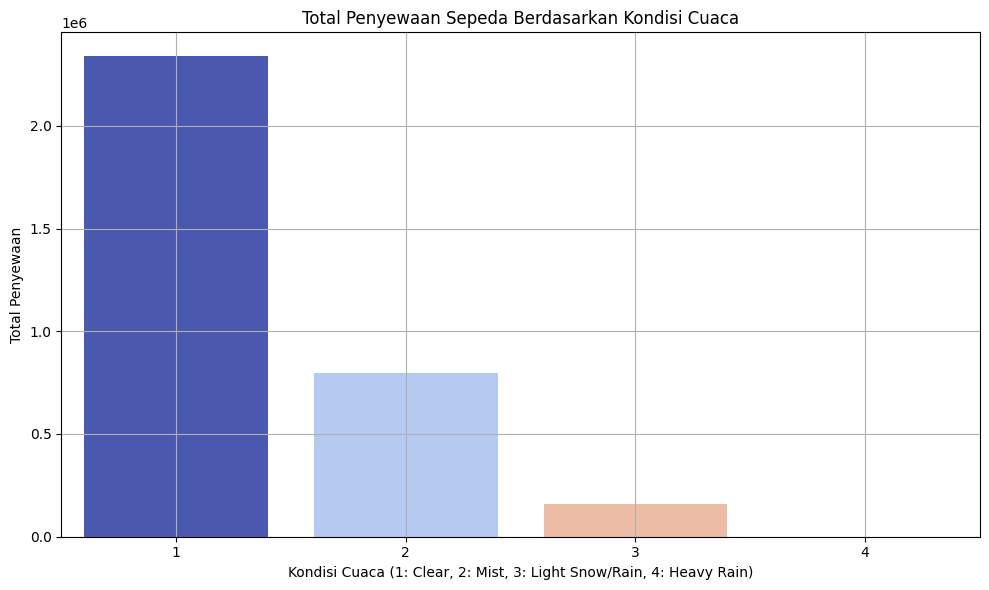

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_clustering, x='weathersit', y='cnt', hue='weathersit', palette='coolwarm', legend=False)
plt.title('Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain)')
plt.ylabel('Total Penyewaan')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- Dari analisis lanjutan diatas, didapatkan bahwa paling banyak penyewaan sepeda pada cuaca range 1 atau cuaca cerah

## Conclusion

- Dari hasil exploratory, explanatory, dan visualisasi pertanyaan 1 didapatkan bahwa penyewaan terbanyak pada bulan 9 tahun 2012
- Dari hasil exploratory, explanatory, dan visualisasi pertanyaan 2 didapatkan bahwa pengguna registered lebih banyak dalam melakukan penyewaan dibandingkan dengan pengguna casual
- Dari hasil exploratory, explanatory, dan visualisasi pertanyaan 3 didapatkan bahwa hari minggu memiliki jumlah pengguna paling sedikit dibandingkan hari senin-sabtu

In [29]:
monthly_performance['type'] = 'monthly_performance'
monthly_avg['type'] = 'monthly_avg'
weekday_usage['type'] = 'weekday_usage'
weather_clustering['type'] = 'weather_clustering'

# Gabungkan semua DataFrame secara vertikal dan tambahkan tag di kolom 'type'
combined_df = pd.concat([monthly_performance, monthly_avg, weekday_usage, weather_clustering], axis=0)

# Simpan hasil ke file CSV
combined_df.to_csv('main_data.csv', index=False)
